# Logistic Regression

## A. Introduction

**Numerical Features:**
- age: age of the patient (years)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- time: follow-up period (days)

**Categorical Features:**
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- diabetes: if the patient has diabetes (boolean)
- sex: woman or man (binary)
- smoking: if the patient smokes or not (boolean)

**Target Variable:**
- death event: if the patient deceased during the follow-up period (boolean)

## B. Importing Libraries & Dataset

In [1]:
# Importing the required libraries and packages  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/heartFailure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## C. Feature Selection

We will divide the columns into two types of variables:
- Feature variable (independent)
- Target variable (dependent)

In [5]:
feature_columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction','high_blood_pressure','platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [6]:
#split dataset in features and target variable
x = df[feature_columns]
y = df['DEATH_EVENT']

## D. Splitting Dataset

We will divide the dataset into a training set and a test set using the function train_test_split() and by passing three parameters: 
- features
- target
- test_set size
- Optional: random_state

In [7]:
# split X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 16)

The Dataset is split into two parts with a ratio of 75:25. It means that 75% data will be used for model training and 25% for model testing.

## E. Model Development 

We will create a Logistic Regression classifier object using the LogisticRegression() function with random_state.

In [8]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

We will fit our model on the train set using fit().

In [9]:
# fit the model with data
model.fit(x_train, y_train)

LogisticRegression()

In [10]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.372660
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                  0.4063
Time:                        15:56:29   Log-Likelihood:                -111.43
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 4.599e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0523      0.015      3.387      0.001       0.022

The statsmodels library gives us a breakdown of the coefficient results as well as the associated p-values to determine the significance.

The values in the coef column of the output tell us the average change in the log odds of surviving heart failure. 

The values in the P>|z| column represent the p-values for each coefficient. Age has a p-value of .001. Since this value is less than .05, it means there is a statistically significant relationship between age and whether or not  a patient  survived or deceased.

Pseudo R-Squared value can range from 0 to 1. Higher values indicate a better model fit. In this example, the pseudo R-squared value is 0.4063. This is not very high. It tells us that the predictor variables age, anaemia, creatinine phosphokinase, etc. in the model don’t do a very good job of predicting the value of the response variable Death Event.

LLR p-value is the substitute to the p-value for the overall F-value of a linear regression model. If this value is below a certain threshold (e.g. α = .05) then we conclude that the model overall is useful and the model is better at predicting the values of the response variable compared to a model with no predictor variables.

## F. Estimation of Model Parameters

We will extract the value for the intercept.

In [11]:
# Get the intercept
intercept = model.intercept_
print(intercept)

[0.00022105]


We will extract the value for the coefficient.

In [12]:
# Extract the coefficients
coefficients = model.coef_
print(coefficients)

[[ 5.38458117e-02  5.36773673e-04  2.31503895e-04  9.27113916e-05
  -7.74073086e-02 -1.58834172e-04 -2.92700745e-06  7.34575441e-03
   1.10442224e-02  3.91177459e-05 -2.10509760e-04 -1.89739330e-02]]


We will place the coefficients into a list.

In [13]:
# Place the coefficients into a list 
coef_list = list(coefficients[0,:])

In [14]:
coef_df = pd.DataFrame({'Feature': list(x_train.columns), 'Coefficient': coef_list})
print(coef_df)

                     Feature  Coefficient
0                        age     0.053846
1                    anaemia     0.000537
2   creatinine_phosphokinase     0.000232
3                   diabetes     0.000093
4          ejection_fraction    -0.077407
5        high_blood_pressure    -0.000159
6                  platelets    -0.000003
7           serum_creatinine     0.007346
8               serum_sodium     0.011044
9                        sex     0.000039
10                   smoking    -0.000211
11                      time    -0.018974


How to interpret the coefficiens? Positive number means increased risk of heart failure. Negative number means decreased risk of heart failure.

We would like to study the effect of age, anaemia, creatinine phosphokinase, serum creatinine, serum sodium, and diabetes on the risk of getting a heart failure.

The coefficient for age can be interpreted as for every 1-degree increase in age, the log odds of death event increase by 0.053846, controlling for all other features in the model.

## G. Prediction

We will perform prediction on the test set using predict(). 

In [15]:
y_pred = model.predict(x_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0]


In [16]:
# Generate predicted probabilities
predicted_prob = model.predict_proba(x_test)[:,1]
print(predicted_prob)

[0.07080456 0.77610264 0.96170099 0.07508564 0.01895285 0.01131578
 0.09761882 0.37361775 0.19721155 0.09784872 0.24765502 0.87959528
 0.15030553 0.33314376 0.01568275 0.22505096 0.04168702 0.03290395
 0.04596488 0.17897766 0.04542936 0.47390284 0.01310331 0.69707556
 0.00348903 0.00672968 0.80380594 0.59536587 0.92166442 0.04326618
 0.13545508 0.2226864  0.0200924  0.82034832 0.1196354  0.01664191
 0.91973768 0.34286205 0.02617931 0.02250461 0.19026347 0.02357007
 0.30526761 0.0085903  0.37041612 0.02122069 0.92743687 0.92396029
 0.15090108 0.887119   0.11366953 0.49934792 0.92169149 0.10489906
 0.11349973 0.59280492 0.3672482  0.15614939 0.01227657 0.02202503
 0.20885994 0.03661011 0.81352057 0.20157818 0.36012269 0.79008463
 0.03164202 0.47360656 0.6787441  0.20522783 0.12296244 0.01281602
 0.42072783 0.39932861 0.0226181 ]


In [17]:
# generate predicted class
predicted_class = model.predict(x_test)
print(predicted_class)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0]


## H. Model Evaluation

A confusion matrix is a table that is used to evaluate the performance of a classification model.

In [18]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted_class))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             48              4     52
Actual Yes            10             13     23
Total                 58             17     75


48 and 13 are actual predictions, and 10 and 4 are incorrect predictions.

We will evaluate the model using classification_report for accuracy, precision, and recall.

In [19]:
target_names = ['survived', 'deceased']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.83      0.92      0.87        52
    deceased       0.76      0.57      0.65        23

    accuracy                           0.81        75
   macro avg       0.80      0.74      0.76        75
weighted avg       0.81      0.81      0.80        75



We got a classification rate of 81%. This is considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. 

## I. ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

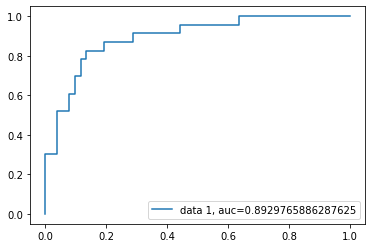

In [20]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area Under Curve (AUC) score for the case is 0.89. AUC score 1 represents a perfect classifier.

## J. GridsearchCV

GridSearch is a method for finding the optimal parameter values from a given set of parameters in a grid. It is a cross-validation technique.

In [21]:
grid = {'penalty': ['l1', 'l2'], 'C': np.linspace(1, 10, 10), 'solver': ['liblinear']}

In [22]:
model2 = GridSearchCV(LogisticRegression(solver='liblinear'), grid, scoring='f1', cv=5)

In [23]:
model2.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

In [24]:
best_parameters = model2.best_params_
print(best_parameters)

{'C': 3.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [25]:
# Generate predicted probabilities
predicted_prob = model2.predict_proba(x_test)[:,1]

In [26]:
# Generate predicted classes
predicted_class = model2.predict(x_test)

In [27]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted_class))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             47              5     52
Actual Yes             9             14     23
Total                 56             19     75


In [28]:
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.74      0.61      0.67        23

    accuracy                           0.81        75
   macro avg       0.79      0.76      0.77        75
weighted avg       0.81      0.81      0.81        75

